In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

In [ ]:
df = pd.read_csv("cleaned_merged_heart_dataset.csv")

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
x = df.drop(columns=['target'])
y = df['target']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:

model = Sequential()
model.add(Input(shape=(x_train.shape[1],)))
model.add(Dense(15, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 15)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 381 (1.49 KB)

 Trainable params: 381 (1.49 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose = 1)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.4174 - loss: 0.7800 - val_accuracy: 0.4603 - val_loss: 0.7393
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5210 - loss: 0.7171 - val_accuracy: 0.6026 - val_loss: 0.6897
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6243 - loss: 0.6640 - val_accuracy: 0.6589 - val_loss: 0.6573
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6958 - loss: 0.6216 - val_accuracy: 0.6887 - val_loss: 0.6191
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7244 - loss: 0.5799 - val_accuracy: 0.7185 - val_loss: 0.5784
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7617 - loss: 0.5336 - val_accuracy: 0.7351 - val_loss: 0.5433
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7620 - loss: 0.5096 - val_accuracy: 0.7550 - val_loss: 0.5158
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7750 - loss: 0.4763 - val_accuracy: 0.7682 - val_l

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8927 - loss: 0.3096 
Test Loss: 0.3136156499385834
Test Accuracy: 0.9021164178848267


In [ ]:
# Evaluasi model pada data testing
y_pred = (model.predict(x_test) > 0.5).astype("int32")  # Threshold 0.5 untuk klasifikasi biner

def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    return accuracy, precision, recall, f1, conf_matrix, class_report

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [ ]:
accuracy, precision, recall, f1, conf_matrix, class_report = evaluate_model(y_test, y_pred)

Accuracy: 0.9021
Error Rate: 0.0979
Precision: 0.9021
Recall: 0.9021
F1-Score: 0.9021
Specificity: 0.9043

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       188
           1       0.90      0.90      0.90       190

    accuracy                           0.90       378
   macro avg       0.90      0.90      0.90       378
weighted avg       0.90      0.90      0.90       378


Confusion Matrix:
[[170  18]
 [ 19 171]]


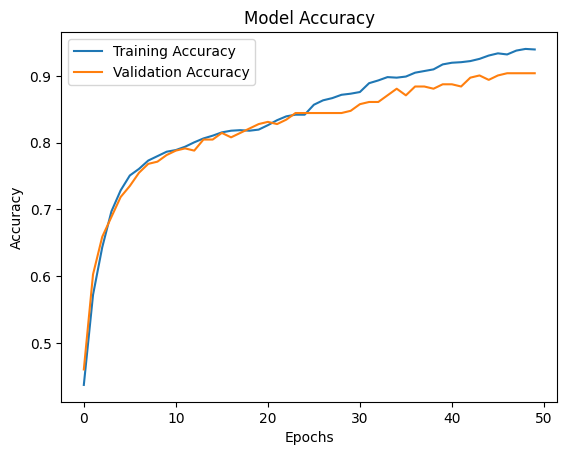

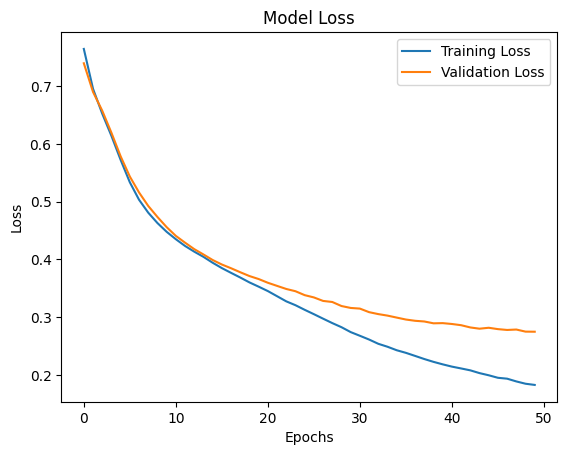

In [ ]:
def display_metrics_text(accuracy, precision, recall, f1, class_report, conf_matrix):
    specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Error Rate: {1 - accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print("\nClassification Report:")
    print(class_report)
    print("\nConfusion Matrix:")
    print(conf_matrix)

display_metrics_text(accuracy, precision, recall, f1, class_report, conf_matrix)

import matplotlib.pyplot as plt

# Ambil data history selama pelatihan
history_dict = history.history

# Plot akurasi
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot kerugian
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
if os.path.exists('heart-attack-predictions.h5'):
    os.remove('heart-attack-predictions.h5')

model.save("heart-attack-predictions.h5")